In [1]:
import time
import sys
import os
from PIL import Image
import numpy as np
import cv2
from keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

import warnings
warnings.simplefilter("ignore")

In [2]:
train_img= r"C:\Users\Asus\Desktop\PG Project\Nandhini\colon_image_set\colon_image_sets\Training"
labels = os.listdir(train_img)
print("No. of labels in the Training set: {}".format(len(labels)))
print("-----------------")
os.chdir(train_img)
for label in labels:
    print("{}, {} files".format(label, len(os.listdir(train_img+ '//' +label))))

No. of labels in the Training set: 2
-----------------
colon_aca, 3493 files
colon_n, 3487 files


In [5]:
test_img = r"C:\Users\Asus\Desktop\PG Project\Nandhini\colon_image_set\colon_image_sets\Testing"
labels = os.listdir(test_img)
print("No. of labels in the Testing set: {}".format(len(labels)))
print("-----------------")
os.chdir(test_img)
for label in labels:
    print("{}, {} files".format(label, len(os.listdir(test_img+ '//' +label))))

No. of labels in the Testing set: 2
-----------------
colon_aca, 1003 files
colon_n, 1003 files


Next, we will plot 10 images aca tumor training images

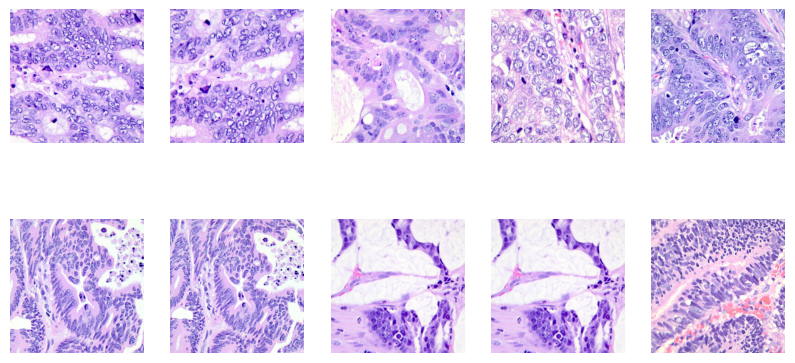

In [6]:
colon_aca = r"C:\Users\Asus\Desktop\PG Project\Nandhini\colon_image_set\colon_image_sets\Training\colon_aca"
sub_class = os.listdir(colon_aca)

fig = plt.figure(figsize=(10,5))
for e in range(len(sub_class[:10])):
    plt.subplot(2,5,e+1)
    img = plt.imread(os.path.join(colon_aca,sub_class[e]))
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    plt.axis('off')

Since this dataset already contains augmented images, so further data augmentation will not be required.  
We will use the ImageDataGenerator class from Keras to split the data into training and validation sets.

In [7]:
img_datagen = ImageDataGenerator(rescale=1./255,
                                 validation_split=0.2)
                                


train_generator = img_datagen.flow_from_directory(train_img,
                                                  class_mode='binary',
                                                 shuffle=True,
                                                 batch_size=32,
                                                 subset='training',
                                                 target_size=(100,100))
                                                 
valid_generator = img_datagen.flow_from_directory(test_img,
                                                 shuffle=True,
                                                  class_mode='binary',
                                                  batch_size=16,
                                                  subset='validation',
                                                 target_size=(100,100))

# Create a lablel_map dictionary that we will use for predicting on unseen data
label_map = (train_generator.class_indices)
print('Label mappings:\n')
label_map

Found 5585 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Label mappings:



{'colon_aca': 0, 'colon_n': 1}

C:\Users\Asus\anaconda3\lib\site-packages\skimage\_shared\utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


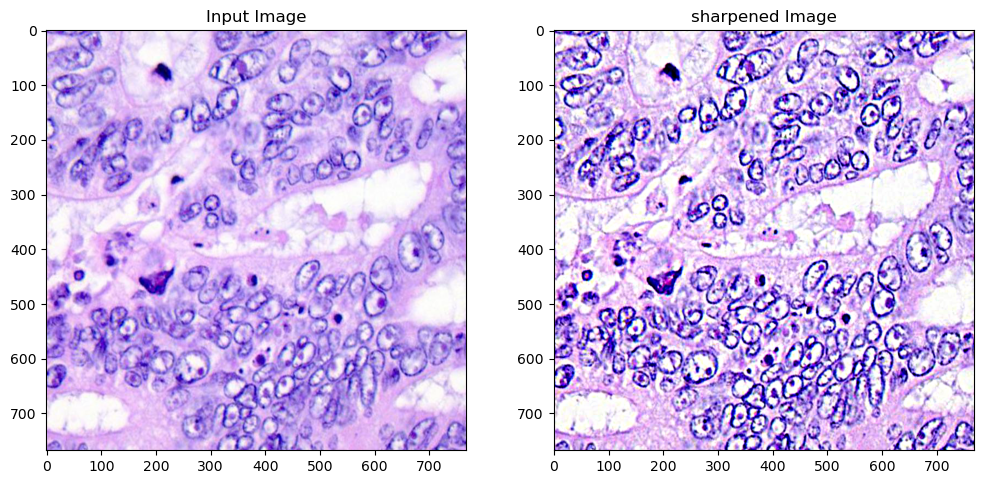

In [1]:
from skimage import io
from skimage.filters import unsharp_mask

img = io.imread(r"C:\Users\Asus\Desktop\PG Project\Nandhini\colon_image_set\colon_image_sets\Training\colon_aca\colonca1509.jpeg")

#sharpened = unsharp_mask(image0, radius=1.0, amount=1.0)
sharped_img = unsharp_mask(img, radius=5, amount=2)


import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(sharped_img, cmap='gray')
ax2.title.set_text('sharpened Image')

plt.show()

(768, 768)


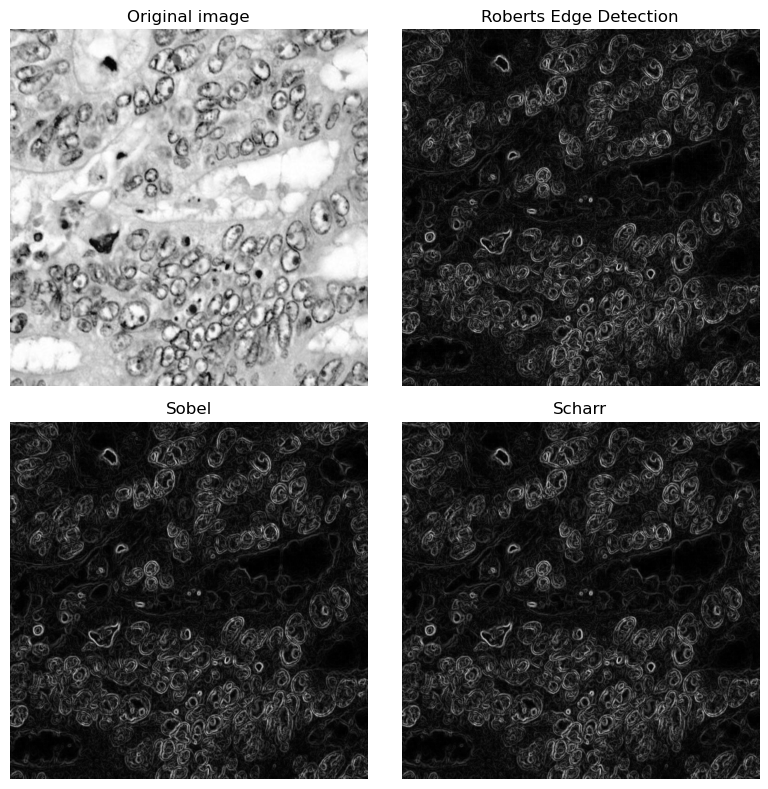

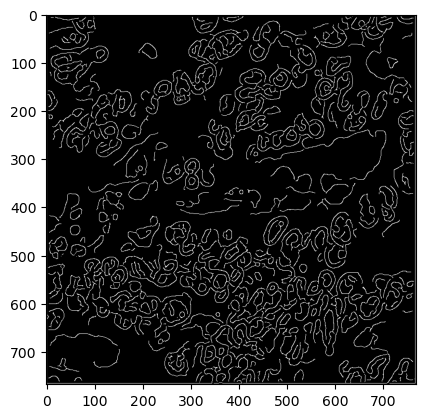

In [5]:
# Edge Detection


import matplotlib.pyplot as plt
from skimage import io
from skimage.filters import roberts, sobel, scharr, prewitt

img = io.imread(r"C:\Users\Asus\Desktop\PG Project\Nandhini\colon_image_set\colon_image_sets\Training\colon_aca\colonca1509.jpeg", as_gray=True)  #Convert to grey scale
print(img.shape)
#plt.imshow(img, cmap=plt.cm.gray, interpolation='nearest')

edge_roberts = roberts(img)
#plt.imshow(edge_roberts, cmap=plt.cm.gray, interpolation='nearest')
edge_sobel = sobel(img)
edge_scharr = scharr(img)
edge_prewitt = prewitt(img)


fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True,
                         figsize=(8, 8))
ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(edge_roberts, cmap=plt.cm.gray)
ax[1].set_title('Roberts Edge Detection')

ax[2].imshow(edge_sobel, cmap=plt.cm.gray)
ax[2].set_title('Sobel')

ax[3].imshow(edge_scharr, cmap=plt.cm.gray)
ax[3].set_title('Scharr')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

#Another edge filter is Canny. This is not just a single operation
#It does noise reduction, gradient calculation, and edge tracking among other things. 
#Canny creates a binary file, true or false pixels. 
from skimage import feature
edge_canny = feature.canny(img, sigma=3)
plt.imshow(edge_canny,cmap='gray')

##  CNN model 
 

In [9]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(100,100,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.4))


model.add(Dense(1, activation='sigmoid'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0

In [10]:
callbacks_list = [EarlyStopping( monitor='accuracy', patience=5 ),
                  ModelCheckpoint( filepath='/content/drive/MyDrive/train results/models/keras_colon_cancer_classification.h5',
                                  monitor='val_accuracy', save_best_only=True, ) ]


Next, we compile the model using the adam optimizer and the categoical_crossentropy loss function since this is a multi-class classification problem.

In [11]:
model.compile(optimizer=RMSprop(),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [12]:
history = model.fit(train_generator, validation_data=valid_generator,
                   steps_per_epoch=train_generator.n//train_generator.batch_size,
                   validation_steps=valid_generator.n//valid_generator.batch_size,
                    callbacks=[callbacks_list],
                    epochs=5)

Epoch 1/5
174/174 [==============================] - 101s 571ms/step - loss: 0.6938 - accuracy: 0.5014 - val_loss: 0.7073 - val_accuracy: 0.5000
Epoch 2/5
174/174 [==============================] - 105s 603ms/step - loss: 0.6777 - accuracy: 0.6006 - val_loss: 0.5522 - val_accuracy: 0.8400
Epoch 3/5
174/174 [==============================] - 104s 599ms/step - loss: 0.5610 - accuracy: 0.7385 - val_loss: 0.3225 - val_accuracy: 0.8875
Epoch 4/5
174/174 [==============================] - 104s 599ms/step - loss: 0.4384 - accuracy: 0.8041 - val_loss: 0.1845 - val_accuracy: 0.9300
Epoch 5/5
174/174 [==============================] - 107s 612ms/step - loss: 0.3484 - accuracy: 0.8534 - val_loss: 0.1490 - val_accuracy: 0.9575


### Plotting model training and validation curves.


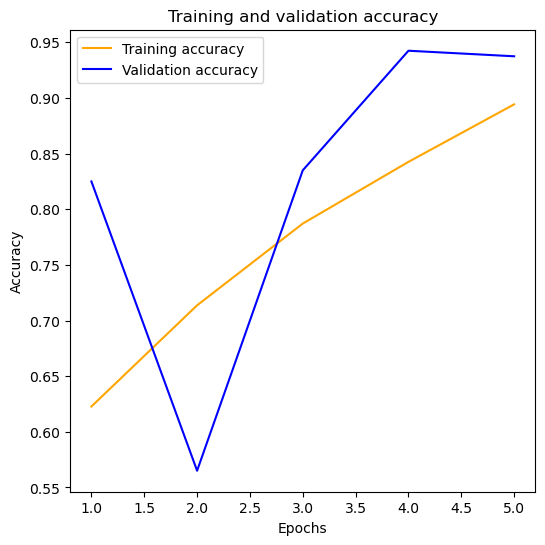

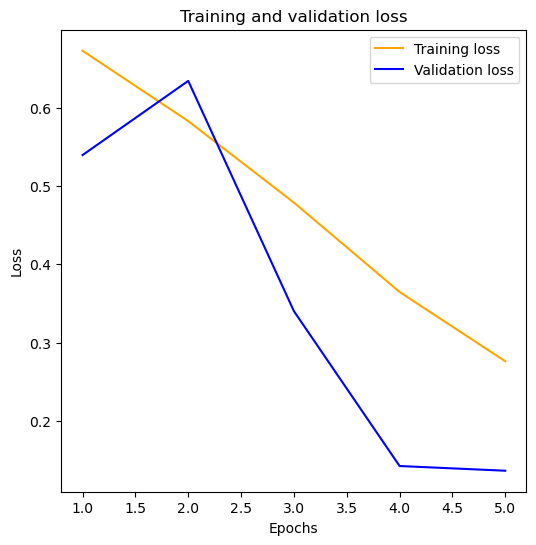

In [15]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(1, len(training_accuracy) + 1)
plt.figure(figsize=(6,6))
plt.plot(epochs, training_accuracy, 'orange', label='Training accuracy')
plt.plot(epochs, validation_accuracy, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(6,6))

plt.plot(epochs, training_loss, 'orange', label='Training loss')
plt.plot(epochs, validation_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [14]:
    temph = history.history
    temp_loss = temph['loss']
    temp_acc = temph['accuracy']
    temp_vloss = temph['val_accuracy']
    temp_vacc = temph['val_accuracy']

    max_valacc = max(temp_vacc)
    max_index = temp_vacc.index(max_valacc)
    max_index
    # Print the result from the last epoch
    
    print('Train accuracy: %s'%history.history['accuracy'][-1])
    print('Validation accuracy: %s'%history.history['val_accuracy'][-1])
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    epochs = range(1, len(loss) + 1) 

Last train Epoch
Train accuracy: 0.8534125685691833
Validation accuracy: 0.9574999809265137


In [13]:
# Define evaluation metrics
from sklearn.metrics import classification_report

# Evaluate the model on the validation set
loss, accuracy = model.evaluate(valid_generator)

# Make predictions on the validation set
y_pred = model.predict(valid_generator)
y_pred = np.argmax(y_pred, axis=1)

# Get the true labels
y_true = valid_generator.classes

# Print evaluation metrics
print('Loss: {:.4f}'.format(loss))
print('Accuracy: {:.4f}'.format(accuracy))
print(classification_report(y_true, y_pred))

25/25 [==============================] - 4s 171ms/step
Loss: 0.1490
Accuracy: 0.9575
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       200
           1       0.00      0.00      0.00       200

    accuracy                           0.50       400
   macro avg       0.25      0.50      0.33       400
weighted avg       0.25      0.50      0.33       400



25/25 [==============================] - 4s 156ms/step


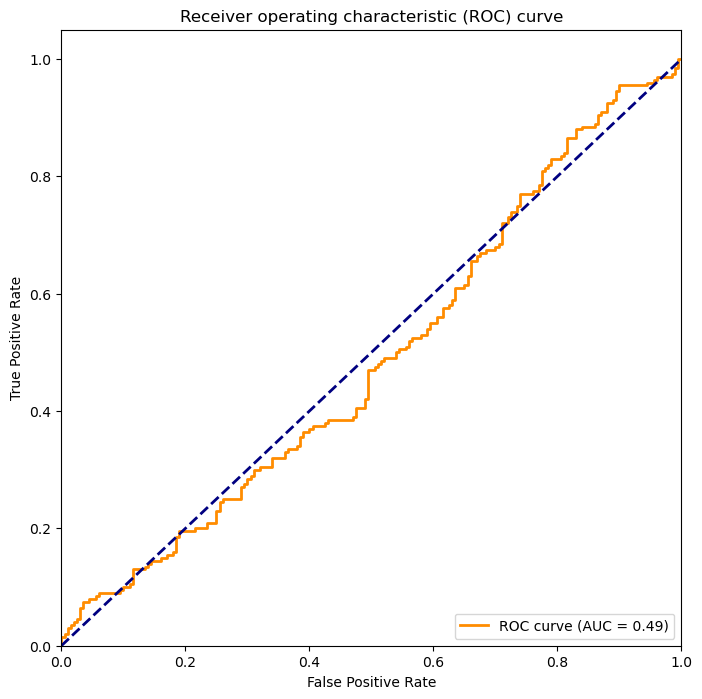

In [15]:
from sklearn.metrics import roc_curve, auc

# make predictions on the validation set
y_pred = model.predict(valid_generator)

# get the true labels for the validation set
y_true = valid_generator.classes

# calculate the false positive rate, true positive rate, and threshold for various probability thresholds
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# plot the ROC curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


### RESNET50

In [13]:
import fastai
import fastbook

In [14]:
from fastai.vision.all import *
path = train_img

dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   get_y=parent_label,
                   splitter=RandomSplitter(),
                   item_tfms=Resize(460),
                   batch_tfms=[*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)])

dls = dblock.dataloaders(path,bs=64)
#dls.normalize(imagenet_stats)

In [15]:
learn = cnn_learner(dls, models.resnet50, metrics=accuracy)

In [16]:
learn.fit_one_cycle(1)

In [17]:
interp_vgg = ClassificationInterpretation.from_learner(learn)

TypeError: savefig() missing 1 required positional argument: 'fname'

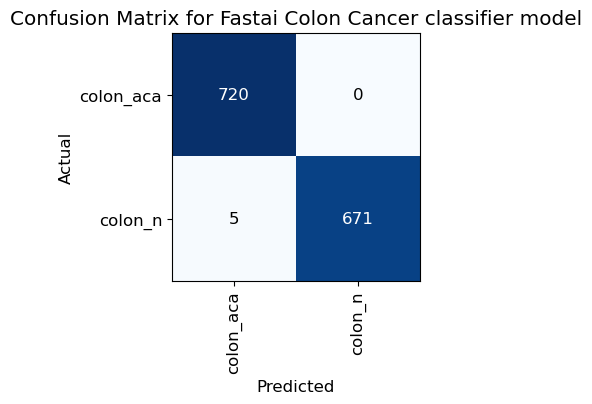

In [26]:
interp_vgg.plot_confusion_matrix(figsize=(4,4),
                                 title='Confusion Matrix for Fastai Colon Cancer classifier model')
plt.savefig()

In [18]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load ResNet50 pre-trained on ImageNet
model = ResNet50(weights='imagenet', include_top=True)

# Load and preprocess test data
valid_datagen = ImageDataGenerator(rescale=1./255)
test_generator = valid_datagen.flow_from_directory(test_img,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

# Make predictions on test data
y_pred = model.predict(test_generator)

# Convert predictions from probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true class labels from test data
y_true = test_generator.classes

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_true, y_pred_classes)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('Confusion matrix:\n', conf_matrix)



102967424/102967424 [==============================] - 254s 2us/step
Found 2006 images belonging to 2 classes.
63/63 [==============================] - 215s 3s/step
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 score: 0.0
Confusion matrix:
 [[   0    0 1003]
 [   0    0 1003]
 [   0    0    0]]


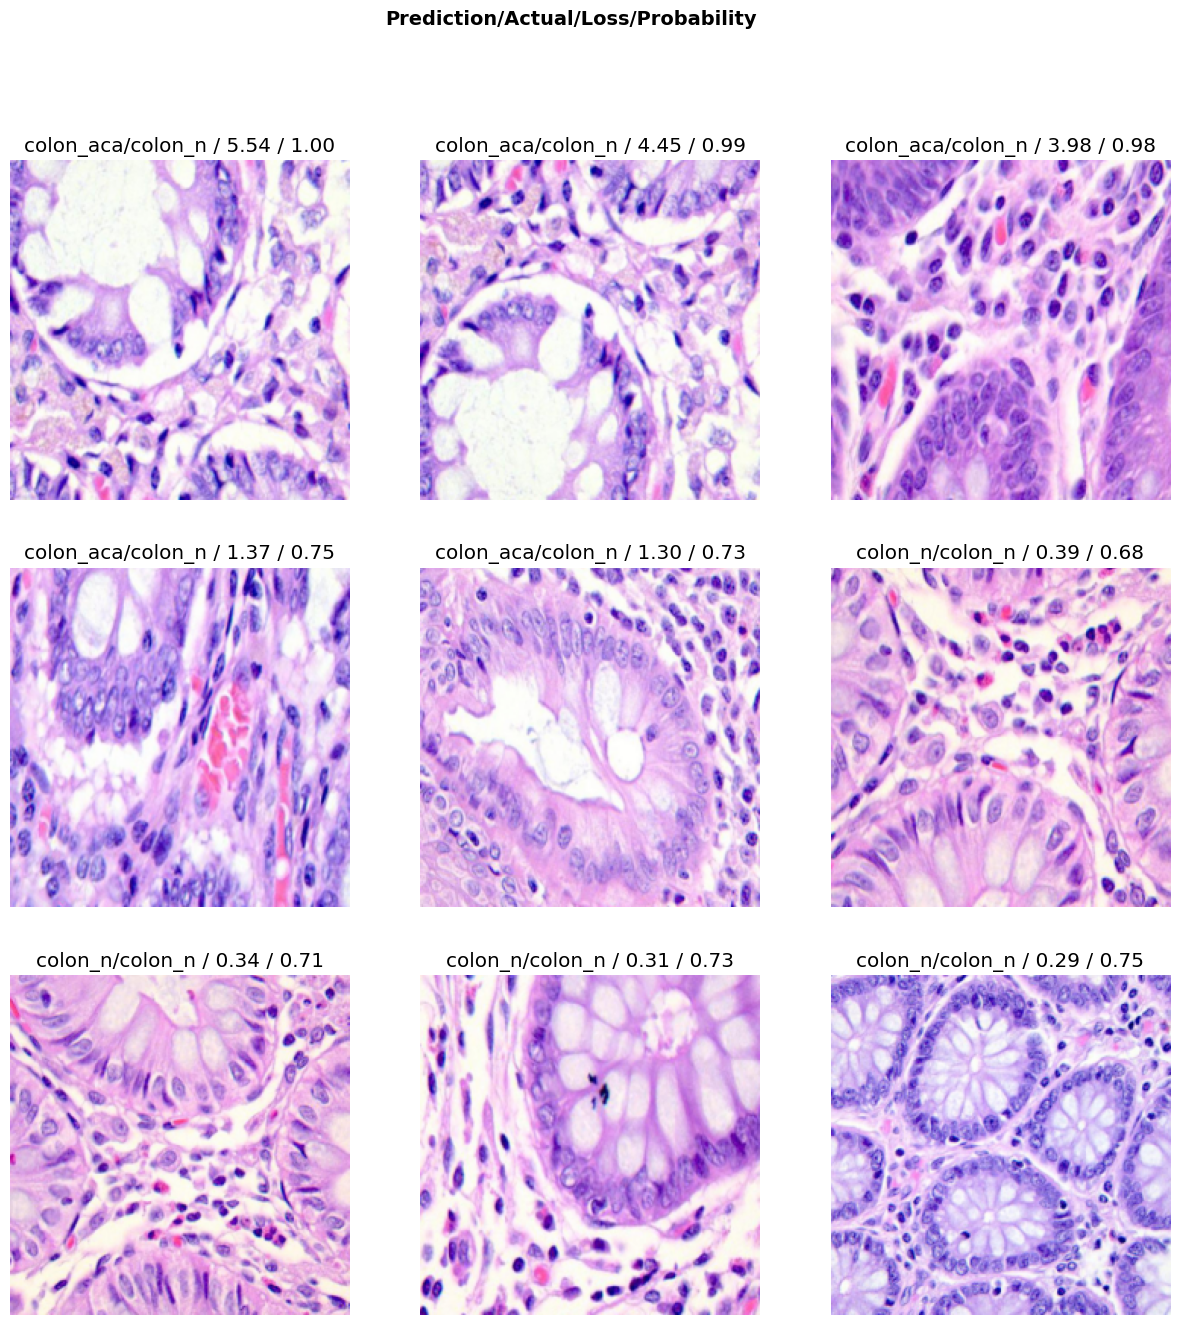

In [27]:
interp_vgg.plot_top_losses(9, figsize=(15,15))